# Лабораторная работа 1

# Установка зависимостей

In [2]:
!pip install gymnasium
!pip install swig
!pip install gymnasium[box2d]
!pip install stable_baselines3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp310-cp310-linux_x86_64.whl size=2373076 sha256=78f365b9bb16f1643e0037134371381ee3cfe352048da2272cfceba6126c4e30
  Stored in directory: /root/.cache/pip/wheels/db/8f/6a/eaaadf056fba10a98d986f6dce954e6201ba3126926fc5ad9e
Successfully built box2d-py


### Импорт зависимостей

In [4]:
import gymnasium as gym
from stable_baselines3 import DDPG
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

### Создание окружения BipedalWalker

In [33]:
env = gym.make("BipedalWalker-v3", max_episode_steps=100)

In [34]:
observation_space = env.observation_space
action_space = env.action_space

### Создание модели
В данном случае модель обучается локально на GPU

In [38]:
model = DDPG("MlpPolicy", env, verbose=1)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


### Обучение модели
100000 шагов

In [39]:
timestamp=100000
model.learn(total_timesteps=timestamp, log_interval=300)
model.save("ddpg_bipedal")

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 97.9     |
|    ep_rew_mean     | -16.2    |
| time/              |          |
|    episodes        | 300      |
|    fps             | 138      |
|    time_elapsed    | 198      |
|    total_timesteps | 27396    |
| train/             |          |
|    actor_loss      | -69.2    |
|    critic_loss     | 3.86     |
|    learning_rate   | 0.001    |
|    n_updates       | 27196    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 98.6     |
|    ep_rew_mean     | -20.7    |
| time/              |          |
|    episodes        | 600      |
|    fps             | 138      |
|    time_elapsed    | 406      |
|    total_timesteps | 56238    |
| train/             |          |
|    actor_loss      | -49.8    |
|    critic_loss     | 2.77     |
|    learning_rate   | 0.001    |
|    n_updates       | 56038    |
--------------

### Визуализация результата

По итогам визуализации видно, что модель обучилась движению в условиях небольшой продолжительности эпохи.

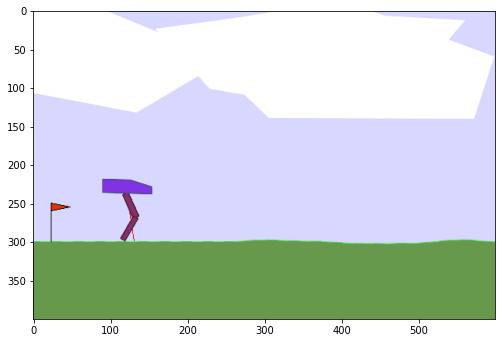

In [41]:
env = gym.make("BipedalWalker-v3", render_mode='rgb_array', max_episode_steps=100)

obs = env.reset()[0]

img = []
for _ in range(200):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, _ = env.step(action)
    if terminated or truncated:
        observation, info = env.reset()
    img.append(env.render())


dpi = 72
interval = 50 # ms

plt.figure(figsize=(img[0].shape[1]/dpi,img[0].shape[0]/dpi),dpi=dpi)
patch = plt.imshow(img[0])
plt.axis=('off')
animate = lambda i: patch.set_data(img[i])
ani = animation.FuncAnimation(plt.gcf(),animate,frames=len(img),interval=interval)
HTML(ani.to_jshtml())

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
!cp ddpg_bipedal.zip ./drive/MyDrive/ITMO/TRL/model

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
